In [6]:
import pandas as pd
import numpy as np
import os

In [7]:
os.chdir(r'C:\Users\MSI-admin\Desktop\Python\Lecture_10 final_test')
df = pd.read_csv('mkt_data.csv')
df

,id,send_date,estimated_age,age_range,channel,coupon,clicked,last_step,nb_units,order_value
0,1,2019-04-12,59,46-60,SMS,2,0,received,0,0
1,2,2019-04-08,27,18-30,Email,2,0,received,0,0
2,3,2019-04-05,74,60+,Email,2,0,received,0,0
3,4,2019-04-21,32,31-45,SMS,2,0,received,0,0
4,5,2019-04-28,42,31-45,Email,2,0,received,0,0
...,...,...,...,...,...,...,...,...,...,...
299995,299996,2019-04-26,23,18-30,Email,2,0,received,0,0
299996,299997,2019-04-30,52,46-60,SMS,4,0,received,0,0
299997,299998,2019-04-22,20,18-30,SMS,2,0,received,0,0
299998,299999,2019-04-04,53,46-60,SMS,2,0,received,0,0


In [8]:
df.head()

,id,send_date,estimated_age,age_range,channel,coupon,clicked,last_step,nb_units,order_value
0,1,2019-04-12,59,46-60,SMS,2,0,received,0,0
1,2,2019-04-08,27,18-30,Email,2,0,received,0,0
2,3,2019-04-05,74,60+,Email,2,0,received,0,0
3,4,2019-04-21,32,31-45,SMS,2,0,received,0,0
4,5,2019-04-28,42,31-45,Email,2,0,received,0,0


<AxesSubplot:>

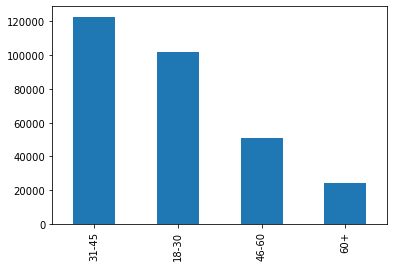

In [9]:
df['age_range'].value_counts().plot(kind='bar')

In [10]:
#Analysis 1
pivot_1 = pd.pivot_table(df, values = ['clicked', 'nb_units'], index = 'age_range', aggfunc = np.sum)
pivot_1

# Insights:
# 1. The amount of clicks correlates positively to the amount of razors purchased (age groups with higher amount of
# clicks also have higher amount of razors purchased successfully)
# 2. Customers from the 31-45 age group have the highest amount of clicks and also purchase the most razors, followed by
# the 18-30 age group. This reflects the distribution of amount of customers recorded from the data.
# 3. The 46-60 age group has the highest chance of converting a click into a purchase unit (695/3265 = 0.213).
# 4. Customers older than 60 years old have almost no interest in buying a razor.

,clicked,nb_units
age_range,,
18-30,6205,1192
31-45,7778,1234
46-60,3265,695
60+,518,14


<AxesSubplot:>

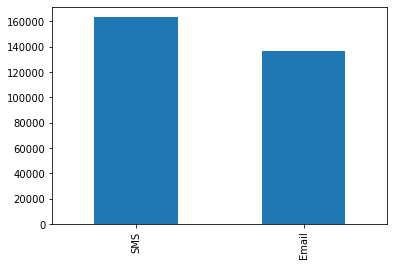

In [11]:
df['channel'].value_counts().plot(kind='bar')

In [12]:
#Analysis 2
pivot_2 = pd.pivot_table(df, values = 'id', index = 'channel', columns = 'last_step', aggfunc = len)
pivot_2

# Insights:
# 1. Advertisements sent through emails have a higher chance to convert to purchases than that of SMS despite having less
# amount of advertisements being sent (948 purchases from 136489 ads in comparison with 914 purchases from 163511 ads).
# 2. The positive correlation between clicks and units of razor purchased remains.

last_step,added to cart,bounced,payment page,purchased,received,saw review
channel,,,,,,
Email,889,2807,195,948,128785,2865
SMS,1864,4143,754,914,153449,2387


In [13]:
#Analysis 3
pivot_3 = pd.pivot_table(df, values = ['nb_units', 'order_value'], index = ['coupon', 'channel'], aggfunc = [np.sum, len])
pivot_3

# Insights:
# Coupons with value of 6 attract more buyers. However, the difference in terms of the ratio to generate payments
# from the $6 coupon type to that of the $4 coupon type is not significant (0.0115 ratio to generate payments compared 
# to 0.0112)
#
# To calculate profit: net profit = (order_value - nb_units*18 - amount of sms or email* price of each sms or email)
#
# Profit generated from emails and sms for each coupon type:
# Coupon with value of 2: Email ($11124.025) ; SMS ($13808.4)
# Coupon with value of 4: Email ($4539.6) ; SMS ($6073.45)
# Coupon with value of 6: Email ($1909.7) ; SMS ($3566.6)
#
# To calculate profit per sms or email: profit per sms or email = net profit / amount of sms or email 
#
# Profit per sms or email:
# Coupon with value of 2: Email ($0.136) ; SMS ($0.1405)
# Coupon with value of 4: Email ($0.1325) ; SMS ($0.1485)
# Coupon with value of 6: Email ($0.0936) ; SMS ($0.1465)
#
# Calculations above show that coupons with value of 6, although were expected to attract more customers, failed to perform
# well. The profit rate per email for this coupon type is even the lowest of the 3 categories. This coupon type is also
# not doing too well in converting clicks into payments.
# Overall, advertisements sent through SMS generate more profit that those sent through emails.

sum                  len            
               nb_units order_value nb_units order_value
coupon channel                                          
2      Email        863       32794    81813       81813
       SMS          918       35246    98272       98272
4      Email        395       14220    34272       34272
       SMS          445       16128    40891       40891
6      Email        215        7310    20404       20404
       SMS          299       10166    24348       24348

In [14]:
#Analysis 4
pivot_4 = pd.pivot_table(df, values = 'nb_units', index = 'age_range', columns = 'last_step', aggfunc = len)
pivot_4

# Insights:
# The amount of customers within the 18-30 age range who exited at the payment page is exceptionally higher than other
# age groups. This implies that we are losing quite a huge amount of potential customers from this group.

last_step,added to cart,bounced,payment page,purchased,received,saw review
age_range,,,,,,
18-30,803,2246,504,699,95902,1953
31-45,1260,3188,194,743,115122,2393
46-60,664,1349,143,412,47628,697
60+,26,167,108,8,23582,209


In [15]:
#Analysis 5
pivot_5 = pd.pivot_table(df, values = 'clicked', index = ['age_range', 'channel'], columns = 'last_step', aggfunc = len)
pivot_5

# Insights:
# 1. Customers from the 18-30 and 46-60 age groups are more likely to make a purchase from SMS than from emails.
# 2. Customers from the 31-45 age group has an usually higher amount of purchases from email clicks than SMS clicks (about
# five times in amount).

last_step          added to cart  bounced  payment page  purchased  received  \
age_range channel                                                              
18-30     Email              296      851            34        273     44413   
          SMS                507     1395           470        426     51489   
31-45     Email              385     1508            60        558     51609   
          SMS                875     1680           134        185     63513   
46-60     Email              194      388            69        115     22006   
          SMS                470      961            74        297     25622   
60+       Email               14       60            32          2     10757   
          SMS                 12      107            76          6     12825   

last_step          saw review  
age_range channel              
18-30     Email           793  
          SMS            1160  
31-45     Email          1760  
          SMS             633  
46-60     Email           229  
          SMS             468  
60+       Email            83  
          SMS             126